In [2]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import scipy
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [3]:
#load data
df = pd.read_csv("food_nutrient_2011_13_AHS.csv")

In [4]:
df.head()

,Food ID,Survey ID,Food Name,Survey flag,"Energy, with dietary fibre (kJ)","Energy, without dietary fibre (kJ)",Moisture (g),Protein (g),Total fat (g),"Available carbohydrates, with sugar alcohols (g)",...,Total saturated fat (g),Total monounsaturated fat (g),Total polyunsaturated fat (g),Linoleic acid (g),Alpha-linolenic acid (g),C20:5w3 Eicosapentaenoic (mg),C22:5w3 Docosapentaenoic (mg),C22:6w3 Docosahexaenoic (mg),Total long chain omega 3 fatty acids (mg),Total trans fatty acids (mg)
0,10F40019,31103001,"Beef, extract, bonox",NaN,401,401,56.6,16.6,0.2,6.5,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,13A12001,31302001,"Basil, dried",NaN,1079,774,10.0,18.2,5.5,15.5,...,2.36,1.40,0.61,0.26,0.34,0.0,0.0,0.0,0.0,0.0
2,10E10113,31302002,"Cardamom, seeds, ground",NaN,1333,1109,8.3,10.8,6.7,40.5,...,2.20,2.81,1.39,1.00,0.39,0.0,0.0,0.0,0.0,0.0
3,10E10098,31302003,Chilli (chili) powder,NaN,1441,1167,7.8,12.3,16.8,20.5,...,2.41,3.15,7.85,7.32,0.52,0.0,0.0,0.0,0.0,0.0
4,10E10107,31302004,"Chilli (chili), dried, ground",NaN,1573,1355,6.6,14.1,16.8,29.6,...,2.42,3.16,7.89,7.36,0.52,0.0,0.0,0.0,0.0,0.0


In [5]:
#drop survey flag
df = df.drop('Survey flag', axis=1)

In [6]:
new_df = df.iloc[:, 4:]
scaler = preprocessing.StandardScaler()
scaler.fit(new_df)
foodscaled = scaler.transform(new_df)
att = new_df.columns.values
dataset = pd.DataFrame(foodscaled, columns = att)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [7]:
dataset.describe()

,"Energy, without dietary fibre (kJ)",Moisture (g),Protein (g),Total fat (g),"Available carbohydrates, with sugar alcohols (g)","Available carbohydrates, without sugar alcohol (g)",Starch (g),Total sugars (g),Added sugars (g),Free sugars (g),...,Total saturated fat (g),Total monounsaturated fat (g),Total polyunsaturated fat (g),Linoleic acid (g),Alpha-linolenic acid (g),C20:5w3 Eicosapentaenoic (mg),C22:5w3 Docosapentaenoic (mg),C22:6w3 Docosahexaenoic (mg),Total long chain omega 3 fatty acids (mg),Total trans fatty acids (mg)
count,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,...,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03,5.740000e+03
mean,6.500801e-17,3.019265e-16,-1.180956e-15,2.405451e-16,-1.250780e-15,3.415386e-16,-3.451749e-15,-2.054222e-15,-2.034609e-15,-2.783294e-17,...,-2.952149e-16,4.947498e-16,-3.060898e-16,8.537620e-16,-5.495362e-16,-5.838545e-15,-4.864266e-15,-4.186450e-16,-2.769136e-15,-5.632835e-16
std,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,...,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00
min,-1.346709e+00,-2.025241e+00,-1.055102e+00,-6.897996e-01,-8.289243e-01,-8.266519e-01,-6.436167e-01,-5.637095e-01,-4.053489e-01,-4.215562e-01,...,-6.020717e-01,-6.044153e-01,-4.021464e-01,-3.700150e-01,-2.191640e-01,-1.960876e-01,-3.497057e-01,-2.046007e-01,-2.446392e-01,-4.197204e-01
25%,-7.676854e-01,-6.542793e-01,-7.918970e-01,-5.942782e-01,-7.838634e-01,-7.859765e-01,-6.436167e-01,-5.491670e-01,-4.053489e-01,-4.215562e-01,...,-5.542782e-01,-5.565101e-01,-3.669012e-01,-3.488923e-01,-2.090066e-01,-1.960876e-01,-3.497057e-01,-2.046007e-01,-2.446392e-01,-4.159664e-01
50%,-2.011476e-01,2.309083e-01,-3.464732e-01,-3.077141e-01,-3.985931e-01,-4.018198e-01,-5.623004e-01,-4.110132e-01,-4.053489e-01,-4.215562e-01,...,-3.548639e-01,-2.822140e-01,-2.212209e-01,-2.274369e-01,-1.480618e-01,-1.960876e-01,-3.442483e-01,-2.046007e-01,-2.401172e-01,-3.117377e-01
75%,5.202908e-01,7.598619e-01,5.949906e-01,1.630698e-01,3.798332e-01,3.845717e-01,3.024666e-01,3.253315e-02,-2.281696e-01,-1.597911e-01,...,1.168908e-01,1.172540e-01,-4.029541e-02,-4.789403e-02,-3.632974e-02,-1.440739e-01,-4.622420e-02,-1.474988e-01,-1.075708e-01,-1.706187e-02
max,4.432601e+00,1.573083e+00,8.865700e+00,6.133155e+00,3.677161e+00,3.692839e+00,4.885888e+00,6.707543e+00,7.648256e+00,7.510719e+00,...,1.462757e+01,1.184940e+01,1.664714e+01,1.871169e+01,5.523042e+01,2.183565e+01,1.600954e+01,1.665006e+01,1.668912e+01,1.887269e+01


In [8]:
df['Energylevels'] = np.where(df['Energy, without dietary fibre (kJ)']>1000, 1, 0)
dataset['EnergyLevel'] = df['Energylevels']

In [16]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset)
principalDf = pd.DataFrame(data=principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Energylevels']]], axis = 1)

In [15]:
eg_high = dataset.loc[dataset['EnergyLevel'] == 1, :]    #assigning high and low energy levels
eg_low = dataset.loc[dataset['EnergyLevel'] == 0, :]

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

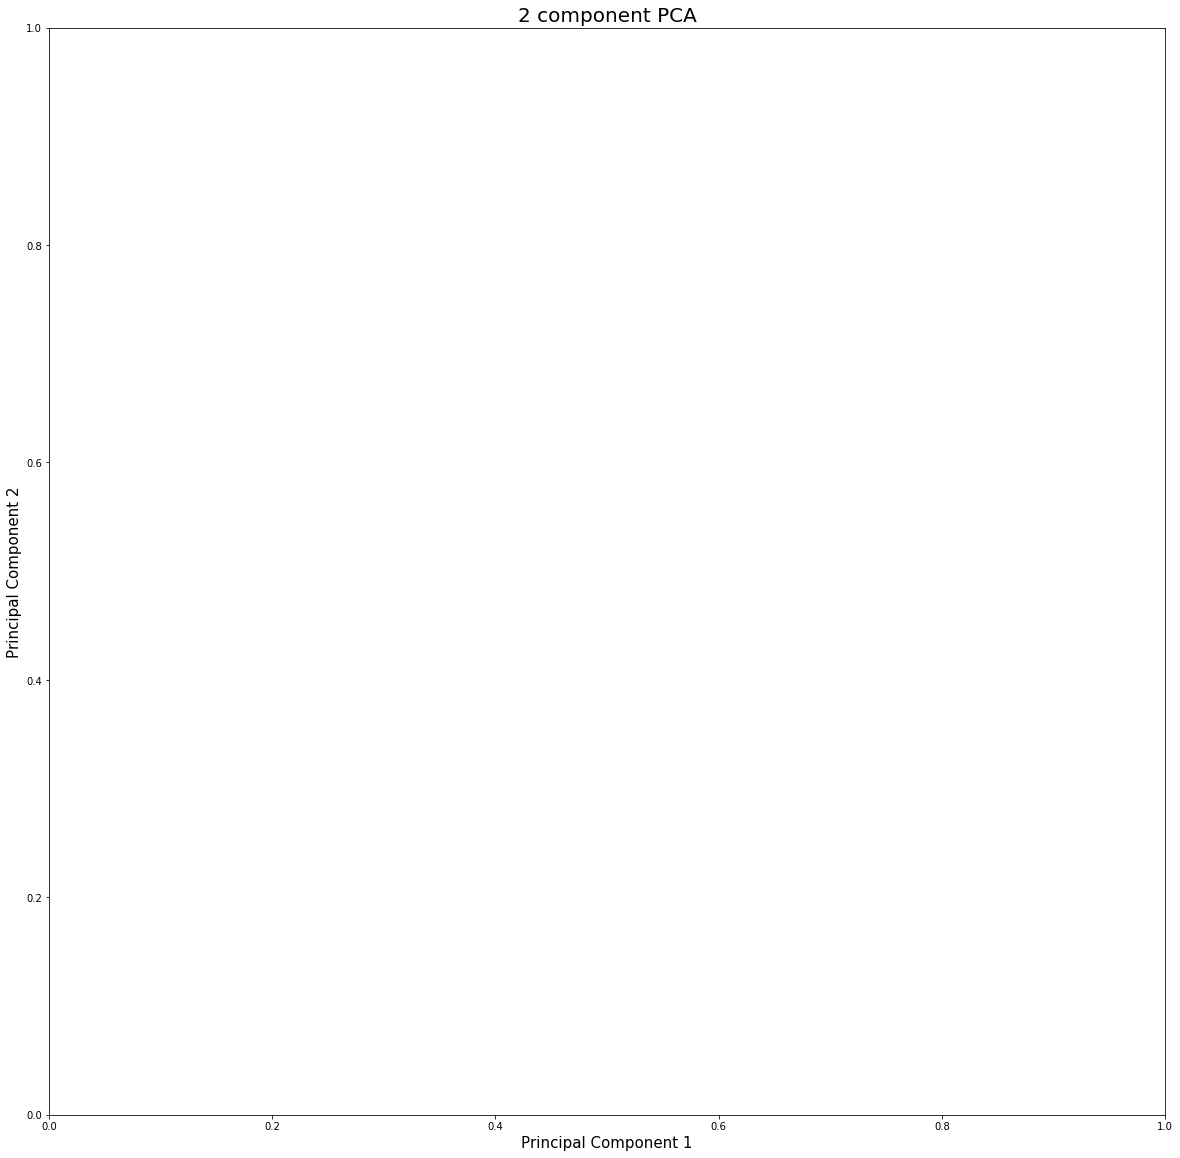

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['High Energy', 'Low Energy']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = dataset['EnergyLevel'] == target
    ax.scatter(dataset.loc[indicesToKeep, 'principal component 1']
               , dataset.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

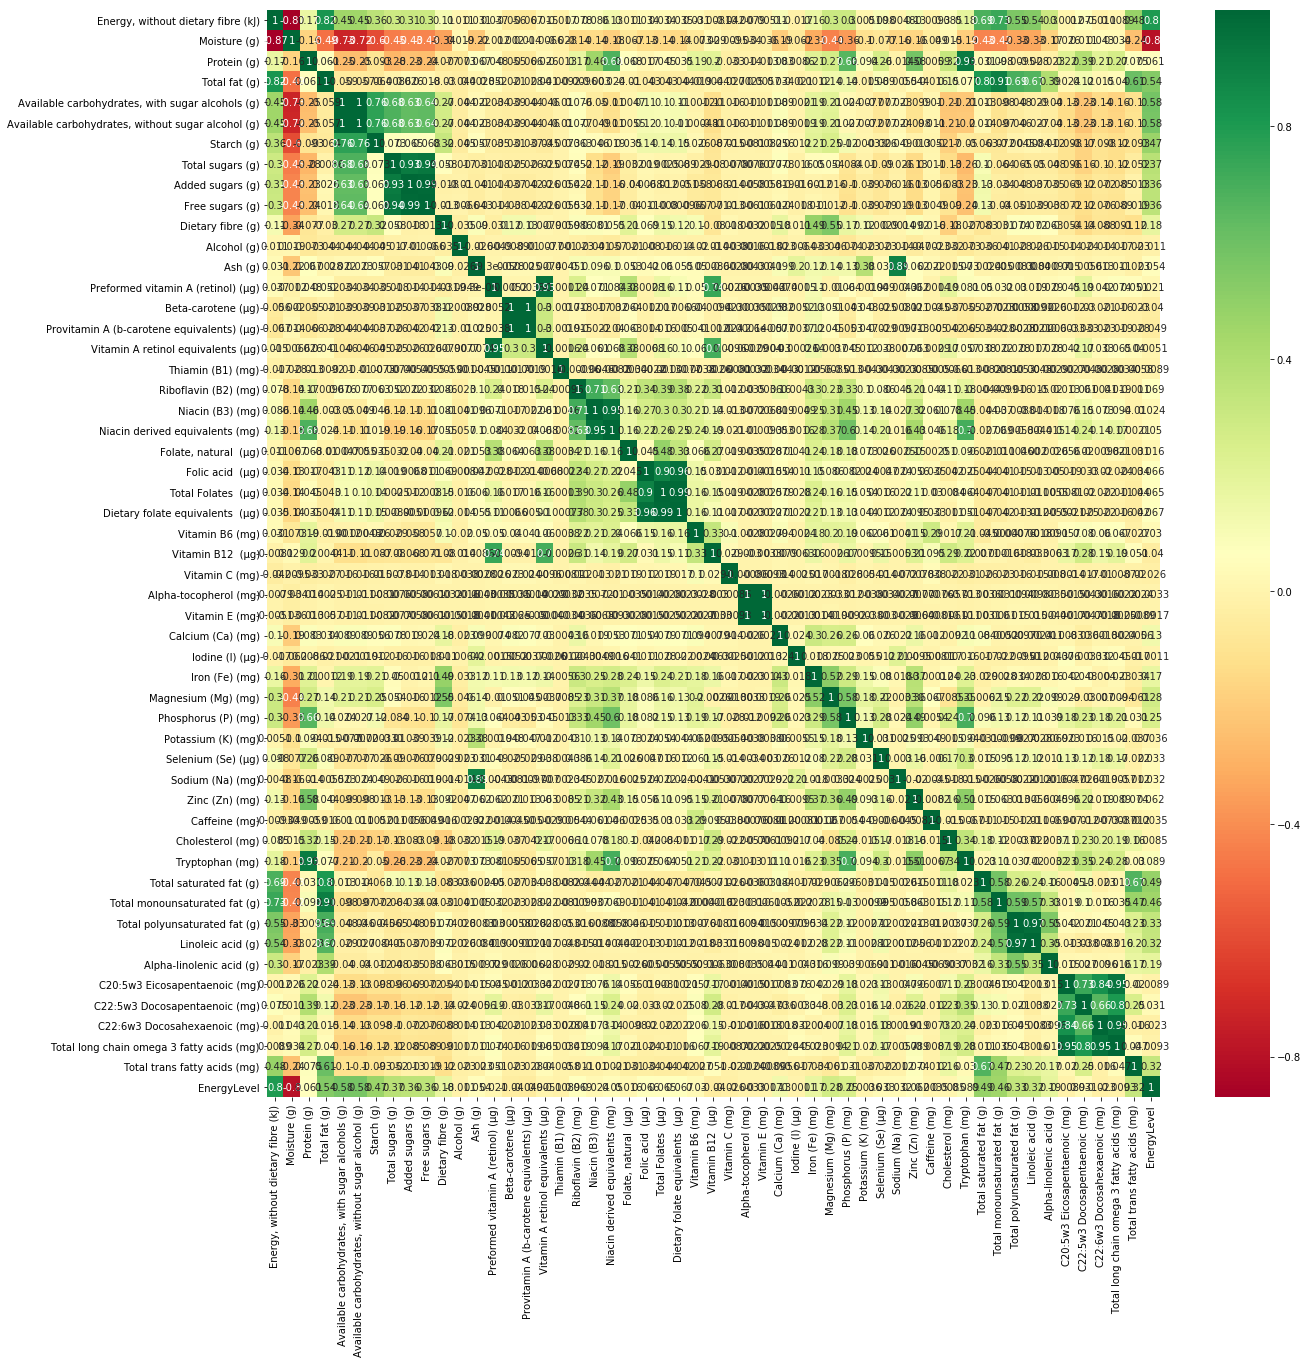

In [10]:
#check correlation
x = dataset.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();